In [1]:
import yfinance as yf
import pandas as pd

In [27]:
DOW30_df = pd.read_csv("DOW30_data.csv")

In [30]:
DOW30_df['Date'] = pd.to_datetime(DOW30_df['Date'])
print(DOW30_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ticker'],
      dtype='object')


In [85]:
DOW30_df_closing_2023 = DOW30_df.pivot(index='Date', columns='ticker', values='Close')
DOW30_df_closing_2023

ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,125.070000,261.649994,85.820000,147.119995,195.389999,238.880005,134.779999,47.939999,173.990005,88.970001,...,122.470001,111.139999,239.580002,118.750000,151.570007,187.119995,518.640015,207.389999,40.119999,47.866669
2023-01-04,126.360001,264.390015,85.139999,150.539993,203.639999,241.360001,139.589996,47.549999,172.139999,91.980003,...,125.150002,112.080002,229.100006,121.209999,152.229996,187.229996,504.500000,212.610001,41.130001,47.919998
2023-01-05,125.019997,266.859985,83.120003,146.429993,204.990005,240.279999,136.339996,46.880001,175.240005,91.919998,...,122.959999,113.639999,222.309998,120.620003,150.339996,187.550003,489.959991,211.110001,41.700001,47.756668
2023-01-06,129.619995,275.200012,86.080002,150.169998,213.000000,248.860001,140.509995,48.320000,176.559998,93.919998,...,126.720001,114.839996,224.929993,124.529999,153.919998,193.869995,490.000000,217.750000,42.189999,48.926666
2023-01-09,130.149994,270.119995,87.360001,150.399994,208.570007,246.619995,147.100006,48.580002,175.179993,94.769997,...,126.790001,110.379997,227.119995,124.849998,152.039993,189.119995,490.059998,218.600006,41.369999,48.316666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.600006,284.160004,153.419998,185.570007,260.440002,290.359985,266.339996,50.090000,151.050003,91.019997,...,106.330002,107.699997,374.579987,108.040001,145.279999,185.800003,520.309998,258.429993,37.490002,52.216667
2023-12-26,193.050003,283.899994,153.410004,185.960007,262.790009,295.630005,266.220001,50.279999,152.410004,90.949997,...,108.110001,107.629997,374.660004,108.019997,145.940002,187.089996,520.030029,259.160004,37.480000,52.136665
2023-12-27,193.149994,286.529999,153.339996,187.059998,262.100006,298.119995,266.720001,50.439999,151.910004,90.379997,...,108.739998,107.980003,374.070007,107.129997,146.059998,188.619995,522.789978,258.929993,37.310001,52.626667


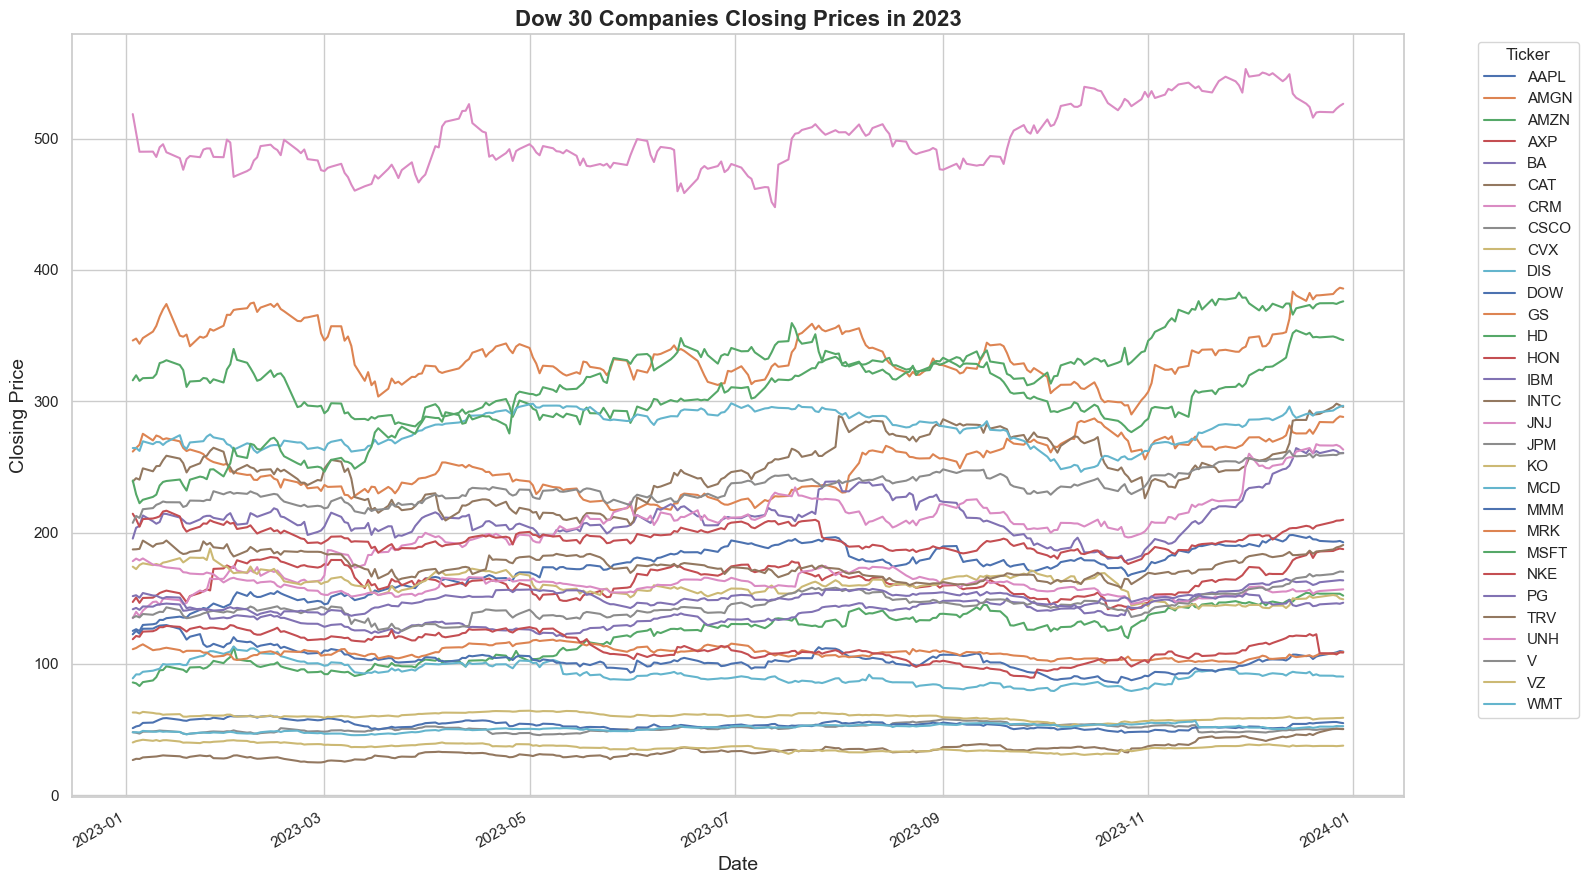

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

DOW30_df_closing_2023.plot(figsize=(16, 9))  
plt.title('Dow 30 Companies Closing Prices in 2023', fontsize=16, fontweight='bold')
plt.ylabel('Closing Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 20.049999999999997, 'Date')

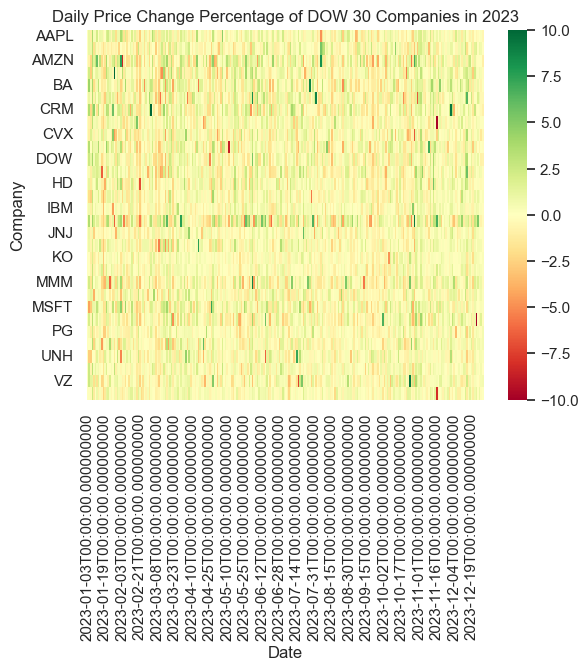

In [76]:
# Heat map of price volatility
price_change_percentage = DOW30_df_closing_2023.pct_change().fillna(0) * 100

sns.heatmap(price_change_percentage.T, cmap='RdYlGn', vmax=10, vmin=-10)
plt.title('Daily Price Change Percentage of DOW 30 Companies in 2023')
plt.ylabel('Company')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

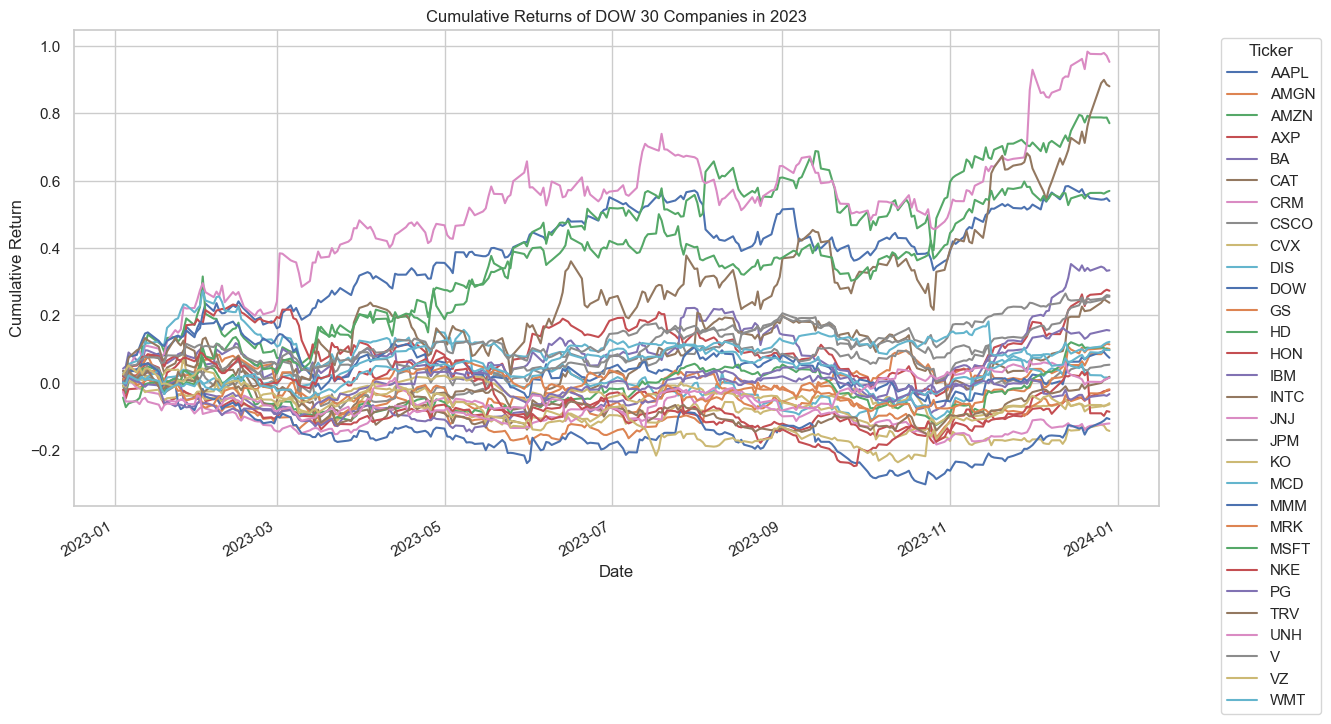

In [86]:
# Cumulative Returns Plot
cumulative_returns = (DOW30_df_closing_2023.pct_change() + 1).cumprod() - 1

cumulative_returns.plot(figsize=(14, 7))
plt.title('Cumulative Returns of DOW 30 Companies in 2023')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')